## Learning regression and classification models by phone sales data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # to render 3D projections
matplotlib.rc("font", size=12) # to enlarge the font of the graph captions

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_text

### 1. Loading and visualizing the source data

In [ ]:
phones = pd.read_csv("1.8_phones.csv")
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


Looking at which OS are available:

In [ ]:
phones.groupby('os').agg('sum')

,disk,price,year
os,,,
Android,3040,308390,106755
iOS,18688,502763,94667


Visualizing the dataset:

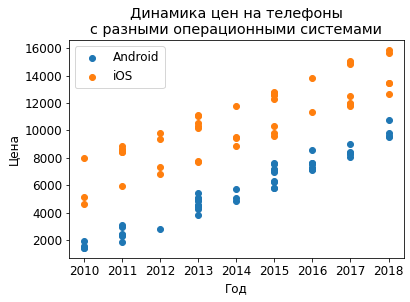

In [ ]:
phones_and = phones[phones['os'] == 'Android']
plt.scatter(phones_and['year'], phones_and['price'], label='Android')

phones_ios = phones[phones['os'] == 'iOS']
plt.scatter(phones_ios['year'], phones_ios['price'], label='iOS')

plt.title('Динамика цен на телефоны\nс разными операционными системами')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.legend()

plt.show()

### 2. Predicting the phone price by the regression model

#### 2.1. The model for Android phones

Uploading the selected attributes (Year and Price) into the appropriate variables:

In [ ]:
X = phones_and[['year']]
y = phones_and['price']

Creating a regressor:

In [ ]:
reg = LinearRegression().fit(X, y)

Checking the price by the first value in the database:

In [ ]:
reg.predict(X[0:1])[0]

7594.063327651937

The value turned out to be satisfactorily close to the real one (7256)

Extracting the necessary coefficients:

In [ ]:
[b] = reg.coef_
a = reg.intercept_

Creating a function to predict the phone price:

In [ ]:
def reg_prediction(year):
    return a + b * year

Creating a graph on which the source data is represented by dots, and the model's predictions are represented by a straight line:

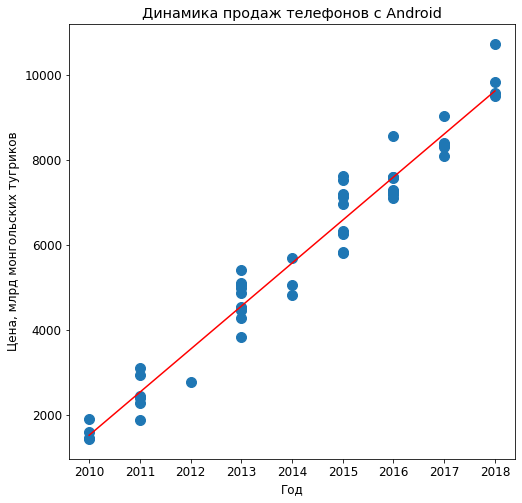

In [ ]:
fig = plt.figure(figsize=(8, 8)) # создаем холст для графика
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones_and['year'], phones_and['price'], s=100)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")

plt.title('Динамика продаж телефонов с Android')
plt.xlabel('Год')
plt.ylabel('Цена, млрд монгольских тугриков')

# отображаем картинку
plt.show()

#### 2.1. The model for iOS phones

Uploading the selected attributes (Year and Price) into the appropriate variables:

In [ ]:
X = phones_ios[['year']]
y = phones_ios['price']

Creating a regressor:

In [ ]:
reg = LinearRegression().fit(X, y)

Checking the price by the first value in the database:

In [ ]:
reg.predict(X[0:1])[0]

13369.874267688254

The value also turned out to be satisfactorily close to the real one (15045)

Extracting the necessary coefficients and creating a function to predict the phone price::

In [ ]:
[b] = reg.coef_
a = reg.intercept_
def reg_prediction(year):
    return a + b * year

Creating a graph on which the source data is represented by dots, and the model's predictions are represented by a straight line:

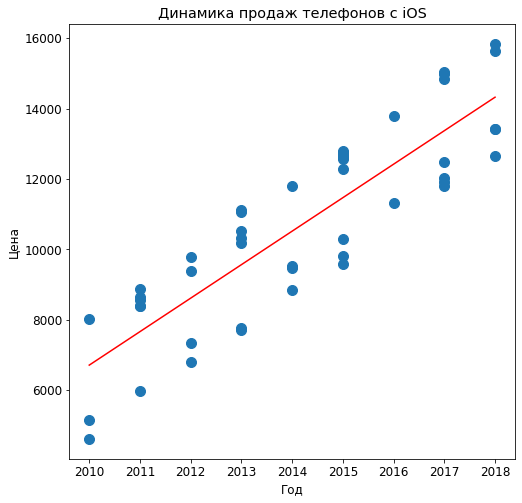

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

ax.scatter(phones_ios['year'], phones_ios['price'], s=100)
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")
plt.title('Динамика продаж телефонов с iOS')
plt.xlabel('Год')
plt.ylabel('Цена')

plt.show()

### 3. Predicting the OS by the classification model

Uploading the selected attributes (Year, Price and OS) into the appropriate variables:

In [ ]:
X = phones[['year', 'price']]
y = phones['os']

Learning the classofication model:

In [ ]:
cl = DecisionTreeClassifier().fit(X, y)

Creating a decision tree:

In [ ]:
print(export_text(cl))

|--- feature_1 <= 7660.50
|   |--- feature_0 <= 2012.50
|   |   |--- feature_1 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_1 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_0 >  2012.50
|   |   |--- class: Android
|--- feature_1 >  7660.50
|   |--- feature_0 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_0 >  2015.50
|   |   |--- feature_1 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_1 >  11017.00
|   |   |   |--- class: iOS



OS prediction and comparison with a real data:

In [ ]:
cl.predict(X[3:4])[0], y[3]

('iOS', 'iOS')